<a href="https://colab.research.google.com/github/iam-rajlaxmi/iam-rajlaxmi/blob/main/DiabetesMajor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Run this first in Colab
!pip install -q scikit-learn pandas matplotlib seaborn


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [12]:
# Load dataset
# Upload your own CSV file
from google.colab import files
from google.colab import files
uploaded = files.upload()

import io

# Automatically detect and read the uploaded file
filename = list(uploaded.keys())[0]  # gets the first uploaded file name
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Preview the data
df.head()



# Replace 0s with NaNs in specific columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Saving diabetes (1).csv to diabetes (1) (2).csv


In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    results[name] = {
        "model": model,
        "accuracy": acc,
        "confusion_matrix": cm,
        "classification_report": cr,
        "roc_auc": auc,
        "y_pred": y_pred,
        "y_proba": y_proba
    }


In [16]:
for name, res in results.items():
    print(f"\n🔹 {name}")
    print(f"Accuracy: {res['accuracy']:.4f}")
    print(f"ROC AUC: {res['roc_auc'] if res['roc_auc'] != 'N/A' else 'Not Available'}")
    print("Classification Report:")
    print(pd.DataFrame(res['classification_report']).transpose())



🔹 Logistic Regression
Accuracy: 0.7532
ROC AUC: 0.8242424242424242
Classification Report:
              precision    recall  f1-score     support
0              0.796117  0.828283  0.811881   99.000000
1              0.666667  0.618182  0.641509   55.000000
accuracy       0.753247  0.753247  0.753247    0.753247
macro avg      0.731392  0.723232  0.726695  154.000000
weighted avg   0.749884  0.753247  0.751034  154.000000

🔹 Random Forest
Accuracy: 0.7208
ROC AUC: 0.8221303948576677
Classification Report:
              precision    recall  f1-score     support
0              0.804348  0.747475  0.774869   99.000000
1              0.596774  0.672727  0.632479   55.000000
accuracy       0.720779  0.720779  0.720779    0.720779
macro avg      0.700561  0.710101  0.703674  154.000000
weighted avg   0.730214  0.720779  0.724015  154.000000

🔹 SVM
Accuracy: 0.7532
ROC AUC: 0.8102846648301193
Classification Report:
              precision    recall  f1-score     support
0              0.7850

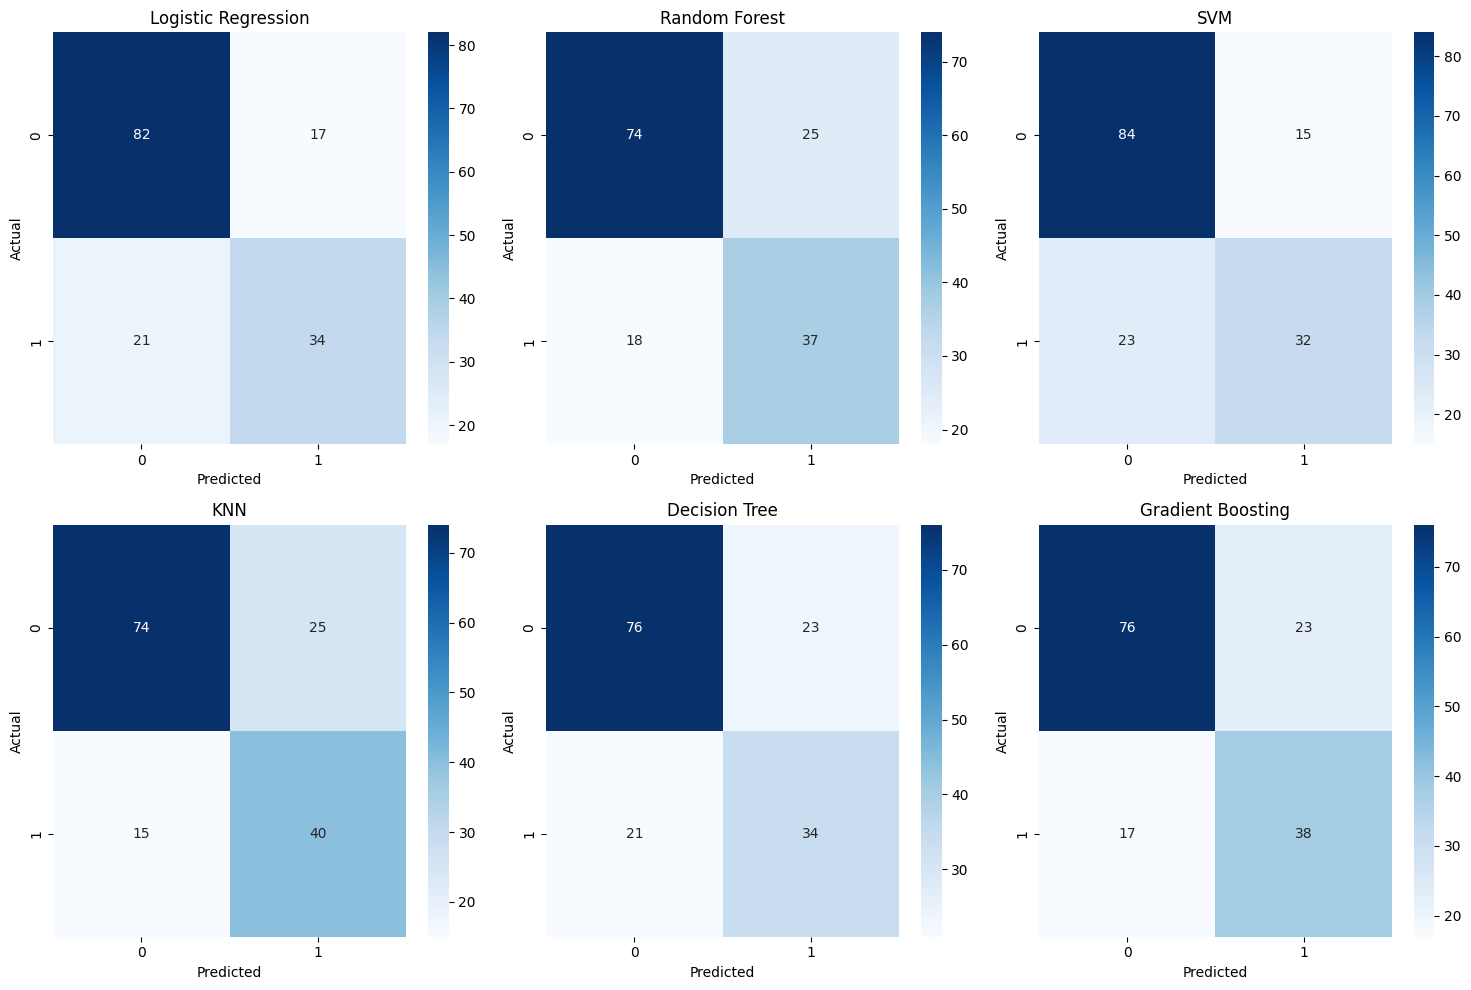

In [17]:
plt.figure(figsize=(15, 10))
for i, (name, res) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(res["confusion_matrix"], annot=True, fmt='d', cmap="Blues")
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()


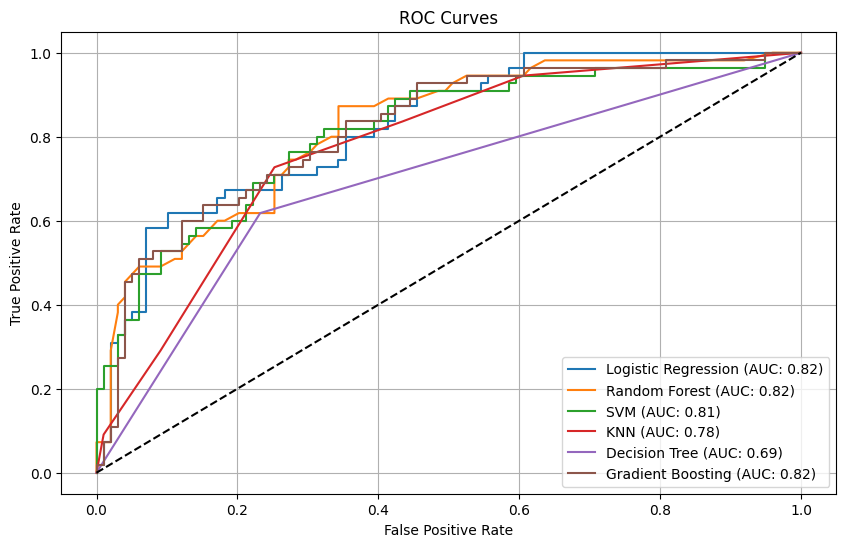

In [18]:
plt.figure(figsize=(10, 6))
for name, res in results.items():
    if res["y_proba"] is not None:
        fpr, tpr, _ = roc_curve(y_test, res["y_proba"])
        plt.plot(fpr, tpr, label=f"{name} (AUC: {res['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
summary_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": [round(res['accuracy'], 4) for res in results.values()],
    "ROC AUC": [res['roc_auc'] if res['roc_auc'] != "N/A" else None for res in results.values()]
})

summary_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)


,Model,Accuracy,ROC AUC
0,Logistic Regression,0.7532,0.824242
1,SVM,0.7532,0.810285
2,Gradient Boosting,0.7403,0.817998
3,KNN,0.7403,0.776492
4,Random Forest,0.7208,0.822130
5,Decision Tree,0.7143,0.692929


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ROC AUC'].plot(kind='hist', bins=20, title='ROC AUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Accuracy', y='ROC AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ROC AUC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ROC AUC')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['ROC AUC'].plot(kind='line', figsize=(8, 4), title='ROC AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='ROC AUC', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [24]:
# Request user input for each feature (values in the same order as the dataset)

print("Please enter the following information:")

pregnancies = float(input("Pregnancies: "))
glucose = float(input("Glucose: "))
blood_pressure = float(input("Blood Pressure: "))
skin_thickness = float(input("Skin Thickness: "))
insulin = float(input("Insulin: "))
bmi = float(input("BMI: "))
diabetes_pedigree_function = float(input("Diabetes Pedigree Function: "))
age = float(input("Age: "))

# Create a dictionary with the input values
new_input = {
    "Pregnancies": pregnancies,
    "Glucose": glucose,
    "BloodPressure": blood_pressure,
    "SkinThickness": skin_thickness,
    "Insulin": insulin,
    "BMI": bmi,
    "DiabetesPedigreeFunction": diabetes_pedigree_function,
    "Age": age
}

# Convert the dictionary into a DataFrame
new_patient_df = pd.DataFrame([new_input])

# Scale the input values using the same scaler
new_patient_scaled = scaler.transform(new_patient_df)

# Use the trained Random Forest model for prediction
rf_model = results["Random Forest"]["model"]

# Predict
prediction = rf_model.predict(new_patient_scaled)
prediction_proba = rf_model.predict_proba(new_patient_scaled)[0][1]

# Show the prediction and probability
print("\n🔍 Prediction (0 = No Diabetes, 1 = Diabetes):", prediction[0])
print("💡 Probability of having diabetes:", round(prediction_proba * 100, 2), "%")


Please enter the following information:
Pregnancies: 0
Glucose: 78
Blood Pressure: 56
Skin Thickness: 4
Insulin: 4
BMI: 5
Diabetes Pedigree Function: 6
Age: 23

🔍 Prediction (0 = No Diabetes, 1 = Diabetes): 0
💡 Probability of having diabetes: 16.0 %
